# **MNIST Digit Visualization**

____________________

## **Context**
____________________

The **MNIST** dataset is an acronym that stands for the **Modified National Institute of Standards and Technology** dataset.

**This dataset consists of 60,000 grayscale images**, which are small 28x28 pixel images. 
<br> **These are images of handwritten digits from 0 to 9.**

In this case study, we will work on this **image data of handwritten digits** and will **visualize the images in two-dimensional space** using the two dimensionality reduction techniques learned in the lecture, i.e., **PCA and t-SNE**.

We will generate **scatter plots to visualize** our own implementation and will also look at the function from the below link.

The function plot_embedding() used for annotated visualization of digits has been taken from <a href = "https://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html#sphx-glr-auto-examples-manifold-plot-lle-digits-py">here</a>.


**Note:** We will use the datasets module of the sklearn library to load the data and will only consider 6 classes, i.e., **digits from 0 to 5**.

## **Importing the libraries**

In [13]:
from time import time

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from matplotlib import offsetbox

from sklearn import manifold, datasets, decomposition

## **Loading the dataset**

In [45]:
digits = datasets.load_digits(n_class = 6)    # Loading the data using the sklearn library

X = digits.data

y = digits.target

n_samples, n_features = X.shape

n_neighbors = 30

In [46]:
X.shape    # Printing the dimensions of X

(1083, 64)

**Observation:** 

- X has **1083 different images** and **each image is represented in 64 dimensions.**

## **Visualizing the data**

Now, let's **reduce the number of dimensions of the images, from 64 to 2**, using PCA and t-SNE, to visualize the distribution of images in 2 dimensions.

In [47]:
# t-SNE embedding of the digits dataset

print("Computing t-SNE embedding")

t0 = time()

tsne = manifold.TSNE(n_components = 2, init = 'pca', random_state = 0) 

X_tsne = tsne.fit_transform(X)

t1 = time()

tsne_time = t1-t0

print("t-SNE-Embeddings in time {}".format(tsne_time),"\n", X_tsne)

print("***************************************************")

# Projection on the first 2 principal components using PCA

print("Computing PCA projection")

t0 = time()

X_pca = decomposition.PCA(n_components = 2).fit_transform(X)

t1 = time()

pca_time = t1 - t0

print("PCA projections in time {}".format(pca_time), "\n", X_pca)

print("***************************************************")

Computing t-SNE embedding
t-SNE-Embeddings in time 1.99178147315979 
 [[ 21.152985 -36.781696]
 [  8.986169  16.158228]
 [-13.393234  15.730511]
 ...
 [ 36.152966  11.976219]
 [ 35.340355   9.206857]
 [ 22.542633 -27.10909 ]]
***************************************************
Computing PCA projection
PCA projections in time 0.0040035247802734375 
 [[ 10.76255843 -24.73807004]
 [ -0.62690578  26.83050011]
 [  1.68579967  12.29145665]
 ...
 [ 30.84986543   6.30638439]
 [ 32.14391395  10.57477508]
 [ 16.46964927 -21.36013652]]
***************************************************


**Observation:** 

- The **time taken to generate t-SNE embeddings is much longer** in comparison to the time taken to generate projections using PCA.

Let's write a **function to create scatter plots** for the generated embeddings and projections.

In [48]:
# Function to create scatter plot

def scatter(X, title = None):
    x1 = []
    
    x2 = []
    
    plt.figure(figsize = (10, 10))
    
    plt.title(title)
    
    for i in X:
        x1.append(i[0])
        
        x2.append(i[1])
    
    sns.scatterplot(x = x1, y = x2)
    
    plt.show()

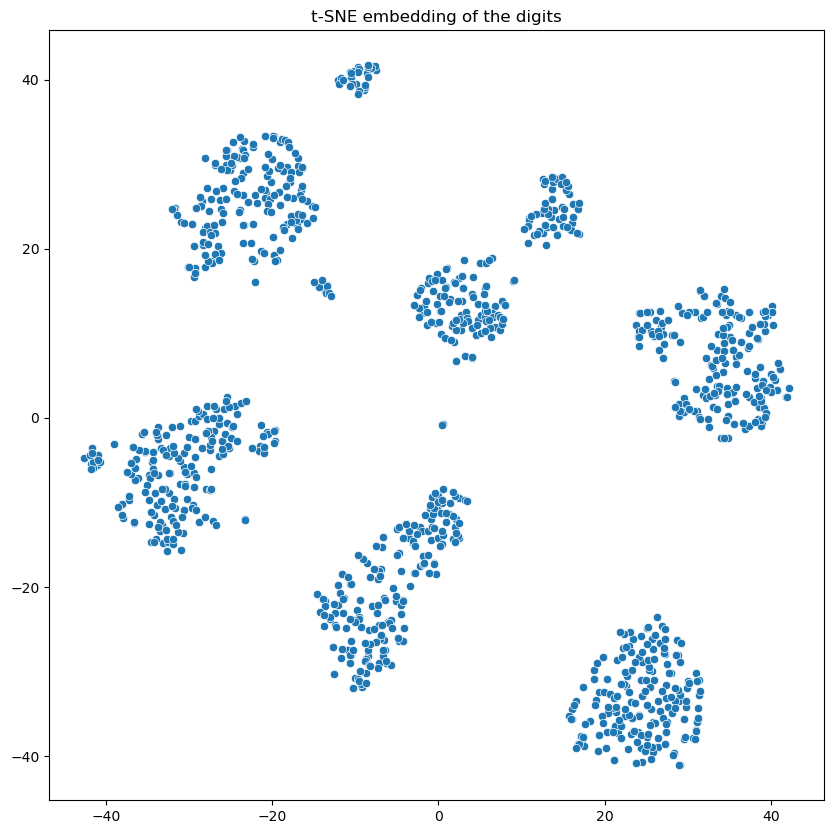

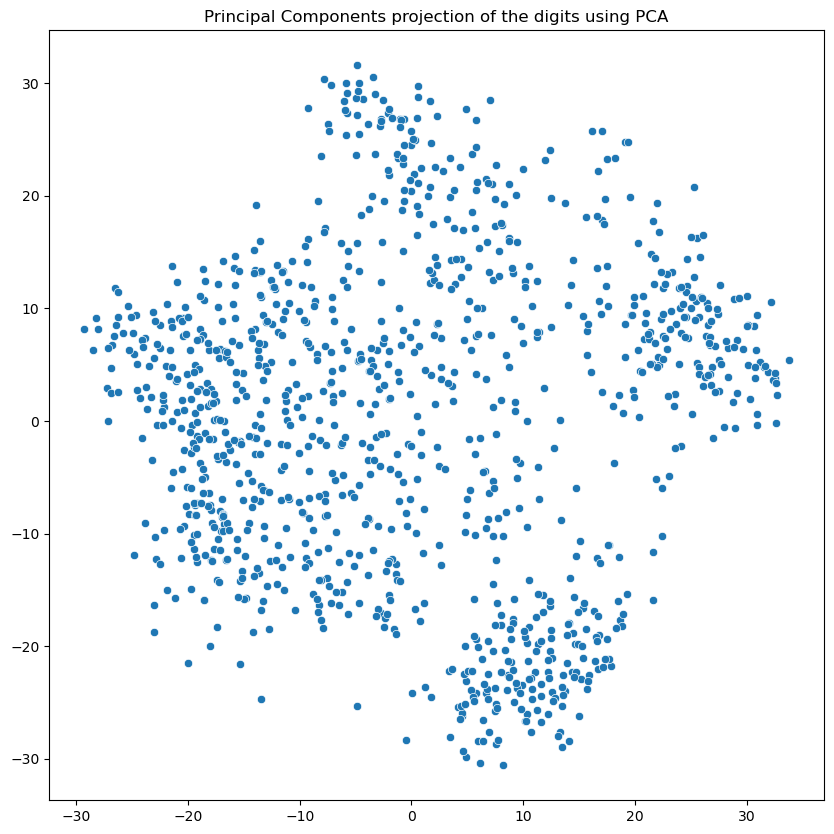

In [49]:
scatter(X_tsne, "t-SNE embedding of the digits")

scatter(X_pca, "Principal Components projection of the digits using PCA")

Now, let's use the **plot_embedding function**, mentioned in the introduction, to get to a **more advanced visualization**. The clusters will still appear in the same way, but will be more informative with annotations.

**Note:** The following code taken from scikit-learn is meant to annotate the embeddings created by PCA and t-SNE and provide a more labeled and informative visualization.

In [86]:
# Scale and visualize the embedding vectors

def plot_embedding(X, title=None):              # Passing the embedded array and the title of the graph
    
    print(X)                                        
    
    x_min, x_max = np.min(X, 0), np.max(X, 0)   # Finding the max and min of the passed array
    
    X = (X - x_min) / (x_max - x_min)           # Scaling the array, new values are between 0 and 1

    plt.figure(figsize = (12, 12))               # Setting the figure size to a sufficiently large value
    
    ax = plt.subplot(111)
    
    for i in range(X.shape[0]):
        
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 
                 color = plt.cm.Set1(y[i] / 10.),
                 
                 fontdict = {'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])      # Just something big
        
        for i in range(X.shape[0]):
            
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            
            if np.min(dist) < 4e-3:
                
                # don't show points that are too close
                continue
            
            shown_images = np.r_[shown_images, [X[i]]]
            
            imagebox = offsetbox.AnnotationBbox(offsetbox.OffsetImage(digits.images[i], cmap = plt.cm.gray_r), X[i])
            
            ax.add_artist(imagebox)
    
    plt.xticks([]), plt.yticks([])
    
    if title is not None:
        
        plt.title(title)
    
    plt.show()

[[ 21.152985 -36.781696]
 [  8.986169  16.158228]
 [-13.393234  15.730511]
 ...
 [ 36.152966  11.976219]
 [ 35.340355   9.206857]
 [ 22.542633 -27.10909 ]]


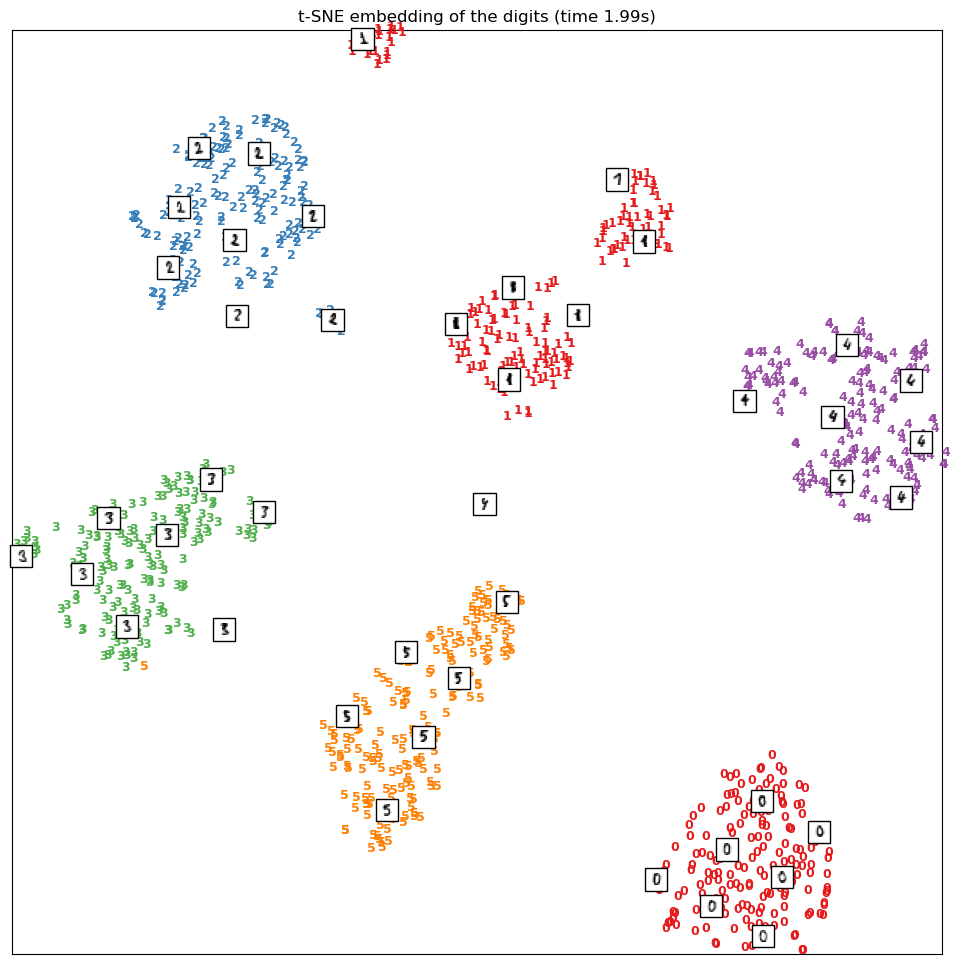

[[ 10.76255843 -24.73807004]
 [ -0.62690578  26.83050011]
 [  1.68579967  12.29145665]
 ...
 [ 30.84986543   6.30638439]
 [ 32.14391395  10.57477508]
 [ 16.46964927 -21.36013652]]


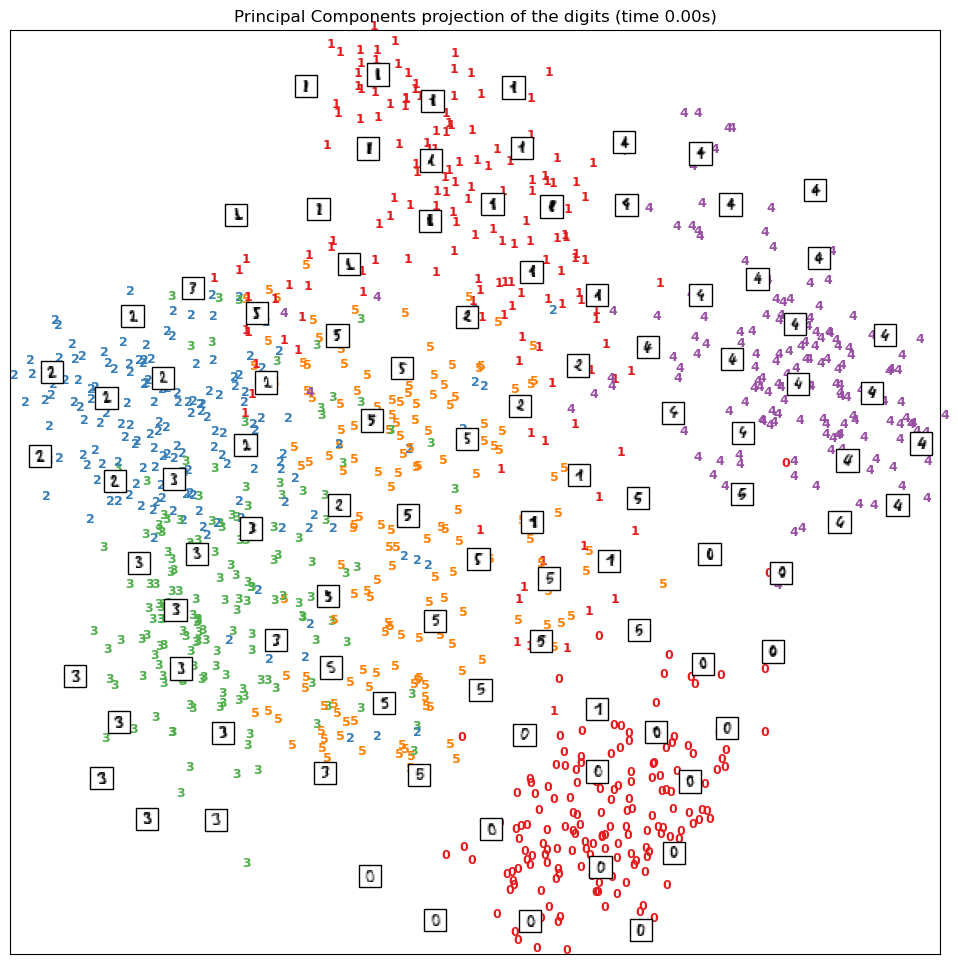

In [87]:
# Plotting t-SNE embeddings 
plot_embedding(X_tsne,
               "t-SNE embedding of the digits (time %.2fs)" %
               (tsne_time))

# Plotting PCA projections
plot_embedding(X_pca,
               "Principal Components projection of the digits (time %.2fs)" %
               (pca_time))

## **Results and Conclusion**

- We have effectively reduced the dimensionality of the images, from 64 to 2, using t-SNE and PCA, and plotted the 2D embeddings and projections.
- Out of the two methods used above, **t-SNE takes a longer time to generate embeddings** but gives **better visualizations with well-separated clusters for each handwritten digit**. 
- The annotations show that while PCA gives the same clusters, the overall plot represents more of a blob and is not as well-separated as t-SNE. 

- **t-SNE is good for visualizing the data in lower dimensions but is very slow and should only be used on small datasets, whereas PCA is more computationally efficient and can be used on large datasets as well.**